# Inspect RFI in VLA Data

In [27]:
import numpy as np
from pyuvdata import UVData

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from ipywidgets import interact

from astropy.time import Time
import astropy.units as u

import os
import sys

sys.path.append("/lustre/aoc/projects/hera/pkeller/data/VLA/19A-056.sb37262953.eb37267948.58744.511782789355")

from vlapy import vladata
from vlapy import inspect

import imp; imp.reload(inspect)

<module 'vlapy.inspect' from '/lustre/aoc/projects/hera/pkeller/data/VLA/19A-056.sb37262953.eb37267948.58744.511782789355/vlapy/inspect.py'>

## Load Data

In [28]:
imp.reload(inspect)

vis = "/lustre/aoc/projects/hera/pkeller/data/VLA/19A-056.sb37262953.eb37267948.58744.511782789355/19A-056.sb37262953.eb37267948.58744.511782789355-hanning.ms"

avg_ntimes = [28, 238, 65, 56, 248, 69, 72, 249, 64]
scan_boundaries = [28, 238, 121, 248, 69, 72, 249, 64]
bls_bins = [1, 1000, 3000, 5000, 10000, 20000, 30000, 40000]

data = inspect.get_data_products(vis, avg_ntimes, bls_bins, masked=False)


KeyboardInterrupt



In [ ]:
freq_array = data["freq array"]
time_array = np.unique(data["time array"])
ant_names = data["ant names"]
dt = data["dt"]
rfi_wf = data["rfi wf"]
rfi_wf_norm = data["rfi wf norm"]
rfi_spec = data["rfi spec"]
per_ant_wf = data["per ant wf"]
per_ant_spec = data["per ant spec"]
bls_bin_wf = data["bls bin wf"]
bls_bin_spec = data["bls bin spec"]

In [ ]:
t = Time(time_array, format="jd", scale="utc")
print(t.iso.shape, np.unique(time_array[1:]-time_array[:-1]))

In [ ]:
cmap = mpl.cm.viridis  # Can be any colormap that you want after the cm
cmap.set_bad(color='red')

## Plot L-Band Spectrograms

### Visibility amplitudes averaged across baselines

<IPython.core.display.Javascript object>


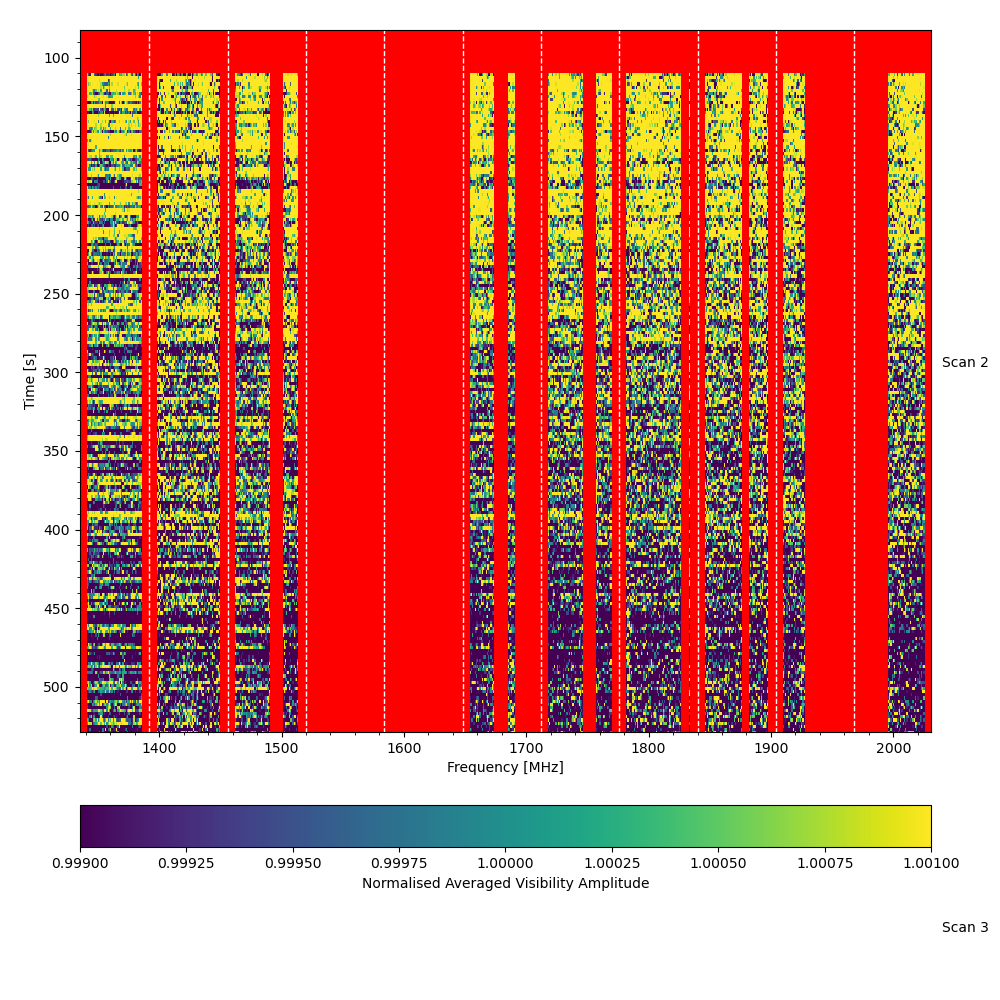

In [24]:
imp.reload(inspect)
%matplotlib notebook
fig, ax = plt.subplots(figsize=(10, 10))
ax, im = inspect.plot_wf(freq_array, rfi_wf_norm, 2, scan_boundaries, vmin=0.9, vmax=1.1, cmap=cmap, ax=ax, plot_masked=True)
fig.colorbar(im, orientation="horizontal", pad=0.08, label="Normalised Averaged Visibility Amplitude")

In [20]:
imp.reload(inspect)

%matplotlib inline
def plot_wf_spw(i):
    inspect.plot_wf_spw(freq_array, rfi_wf_norm, i, 2, scan_boundaries)
    
interact(plot_wf_spw, i=(0, 15))

interactive(children=(IntSlider(value=7, description='i', max=15), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_wf_spw(i)>

### Visibility amplitudes averaged across baselines formed by an antenna
Iterate over antennas.

In [8]:
imp.reload(inspect)
%matplotlib inline

def plot_ant_wf(i):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax, im = inspect.plot_wf(freq_array, per_ant_wf[i], ax=ax, vmin=0.9, vmax=1.1);
    ax.set_title(f"Antenna {ant_names[i]}", pad=25)
    fig.colorbar(im, orientation="horizontal", pad=0.08, label="Normalised Averaged Visibility Amplitude")
    
interact(plot_ant_wf, i=(0, 26))

interactive(children=(IntSlider(value=13, description='i', max=26), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_ant_wf(i)>

In [26]:
imp.reload(inspect)

%matplotlib inline
def plot_ant_wf_spw(i, j):
    print(f"Antenna {ant_names[i]}")
    inspect.plot_wf_spw(freq_array, per_ant_wf[i], j, 2, scan_boundaries)
    
interact(plot_ant_wf_spw, i=(0, 26), j=(0, 15))

interactive(children=(IntSlider(value=13, description='i', max=26), IntSlider(value=7, description='j', max=15…

<function __main__.plot_ant_wf_spw(i, j)>

### Visibility amplitudes averaged across baselines within a particular range of baseline lengths
Iterate over baseline length bins.

In [10]:
def plot_bls_bin_wf(i):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax, im = inspect.plot_wf(freq_array, bls_bin_wf[i], ax=ax, vmin=0.9, vmax=1.1);
    ax.set_title(fr"Baseline Lengths: ${bls_bins[i] // 1000}-{bls_bins[i+1] // 1000}\,$km", pad=25)
    fig.colorbar(im, orientation="horizontal", pad=0.08, label="Normalised Averaged Visibility Amplitude")

interact(plot_bls_bin_wf, i=(0, 6))

interactive(children=(IntSlider(value=3, description='i', max=6), Output()), _dom_classes=('widget-interact',)…

<function __main__.plot_bls_bin_wf(i)>

In [11]:
imp.reload(inspect)
def plot_bls_bins_wf_spw(i, j):
    print(fr"Baseline Lengths: {bls_bins[i] // 1000}-{bls_bins[i+1] // 1000} km")
    inspect.plot_wf_spw(freq_array, bls_bin_wf[i], j, 2, scan_boundaries)
    
interact(plot_bls_bins_wf_spw, i=(0, 6), j=(0, 15))

interactive(children=(IntSlider(value=3, description='i', max=6), IntSlider(value=7, description='j', max=15),…

<function __main__.plot_bls_bins_wf_spw(i, j)>

## Plot L-Band Spectra

### Visibility amplitudes averaged across times and baselines

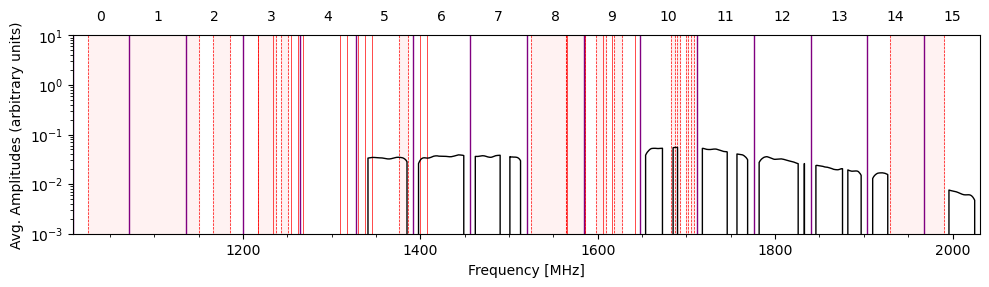

In [12]:
from vlapy.rfi_freq import rfi_freq_continuous_or_strong

inspect.plot_spec(freq_array, rfi_spec, rfi_ranges=rfi_freq_continuous_or_strong);

In [13]:
imp.reload(inspect)
def plot_spec_spw(i):
    inspect.plot_spec_spw(freq_array, rfi_spec, i)
    
interact(plot_spec_spw, i=(0, 15))

interactive(children=(IntSlider(value=7, description='i', max=15), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_spec_spw(i)>

### Visibility amplitudes averaged across times and baselines formed by an antenna
Iterate over antennas.

In [14]:
def plot_ant_spec(i):
    fig, ax = plt.subplots(figsize=(10, 3))
    ax = inspect.plot_spec(freq_array, per_ant_spec[i], ax=ax);
    ax.set_title(f"Antenna {ant_names[i]}", pad=25)
    
interact(plot_ant_spec, i=(0, 26))

interactive(children=(IntSlider(value=13, description='i', max=26), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_ant_spec(i)>

In [15]:
imp.reload(inspect)
def plot_spec_spw(i, j):
    print(f"Antenna {ant_names[i]}")
    fig, ax = plt.subplots(figsize=(12, 10))
    inspect.plot_spec_spw(freq_array, per_ant_spec[i], j, ax, fig)
    
interact(plot_spec_spw, i=(0, 26), j=(0, 15))

interactive(children=(IntSlider(value=13, description='i', max=26), IntSlider(value=7, description='j', max=15…

<function __main__.plot_spec_spw(i, j)>

### Visibility amplitudes averaged across times and baselines within a particular range of baseline lengths
Iterate over baseline length bins.

In [16]:
def plot_bls_bin_spec(i):
    fig, ax = plt.subplots(figsize=(10, 3))
    ax = inspect.plot_spec(freq_array, bls_bin_spec[i], ax=ax);
    ax.set_title(fr"Baseline Lengths: ${bls_bins[i] // 1000}-{bls_bins[i+1] // 1000}\,$km", pad=25)
    
interact(plot_bls_bin_spec, i=(0, 3))

interactive(children=(IntSlider(value=1, description='i', max=3), Output()), _dom_classes=('widget-interact',)…

<function __main__.plot_bls_bin_spec(i)>

In [17]:
imp.reload(inspect)
def plot_spec_spw(i, j):
    print(fr"Baseline Lengths: {bls_bins[i] // 1000}-{bls_bins[i+1] // 1000} km")
    fig, ax = plt.subplots(figsize=(12, 10))
    inspect.plot_spec_spw(freq_array, bls_bin_spec[i], j, ax, fig)
    
interact(plot_spec_spw, i=(0, 3), j=(0, 15))

interactive(children=(IntSlider(value=1, description='i', max=3), IntSlider(value=7, description='j', max=15),…

<function __main__.plot_spec_spw(i, j)>

### Plot spectral window summary

divide by zero encountered in log10
invalid value encountered in scalar subtract
divide by zero encountered in log10
Data has no positive values, and therefore cannot be log-scaled.
Attempt to set non-positive ylim on a log-scaled axis will be ignored.
invalid value encountered in scalar add
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be

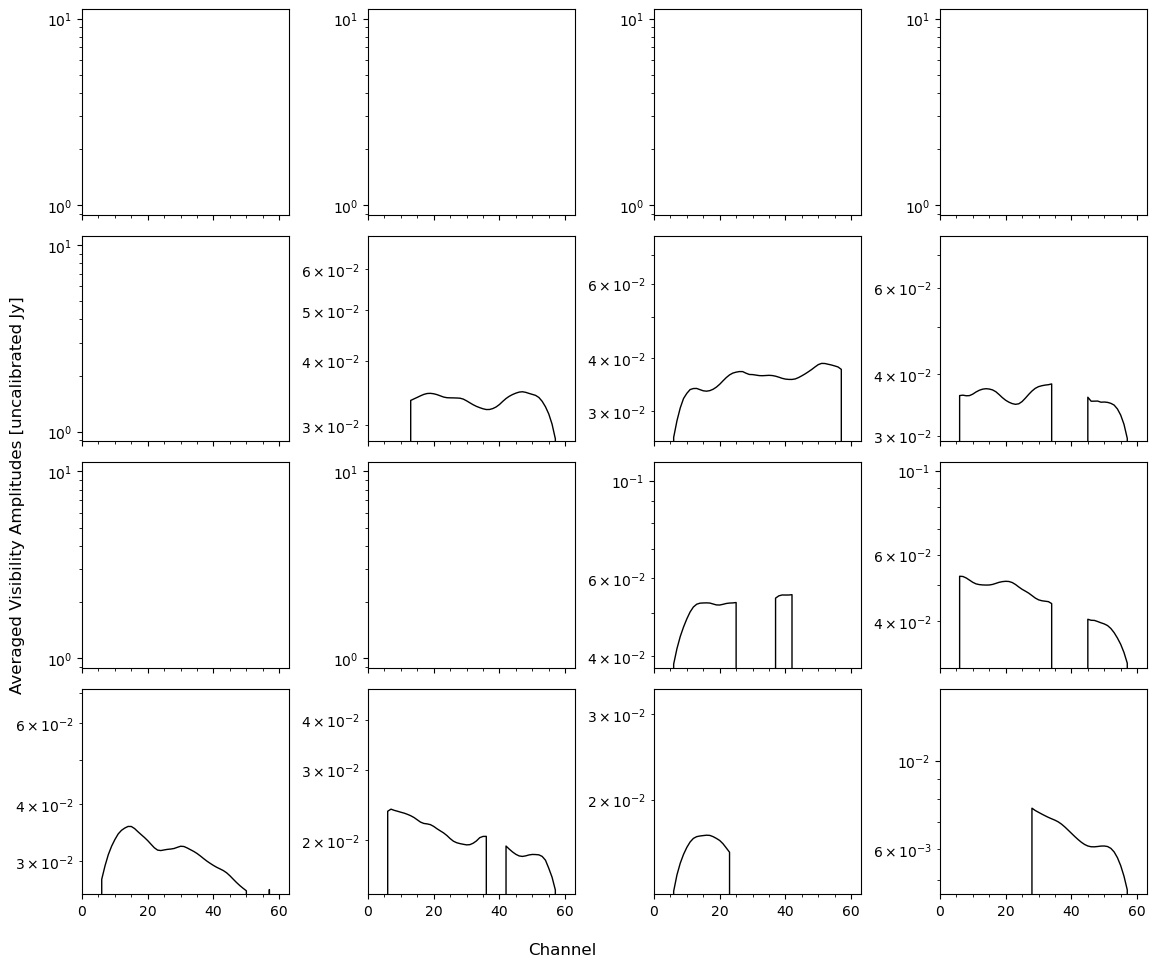

In [18]:
imp.reload(inspect)

inspect.plot_spec_spw_summary(freq_array, rfi_spec);